### EDA and Data Visualization

In [1]:
import warnings

warnings.filterwarnings('ignore')

import pyspark

from pyspark.sql import SparkSession

import pandas as pd

from pyspark.sql.functions import isnan, when, count, col,avg

In [3]:
spark = SparkSession.builder.appName('EDA').getOrCreate()

In [4]:
df = spark.read.parquet('spark-warehouse/loan_data_cleaned')

In [5]:
df.toPandas().head()

term home_ownership grade             purpose int_rate addr_state  \
0   36 months       MORTGAGE     C         credit_card   13.56%         NC   
1   60 months       MORTGAGE     C  debt_consolidation   13.56%         NJ   
2   36 months       MORTGAGE     A  debt_consolidation    6.67%         CT   
3   36 months           RENT     B  debt_consolidation   10.08%         TX   
4   36 months       MORTGAGE     B         credit_card   11.55%         AZ   

  loan_status application_type  loan_amnt emp_length  annual_inc  delinq_2yrs  \
0     Current       Individual      16000    4 years     40000.0            0   
1     Current       Individual      25000    5 years     68000.0            1   
2     Current       Individual      15000    5 years     60000.0            0   
3     Current       Individual      10000     1 year     60000.0            0   
4     Current       Individual      12000    5 years     46000.0            0   

   total_acc term_cleaned emplen_cleaned  revolutil_cleaned bad_loan  
0          9          36               4               54.0       No  
1         19          60               5                1.0       No  
2         25          36               5               36.0       No  
3          9          36               1               40.0       No  
4         37          36               5               34.0       No

In [6]:
### Check for any NaN or Null value in data

In [7]:
df.select([count(when(isnan(c)|col(c).isNull(), c)).alias(c) for c in df.columns]).toPandas().transpose()

0
term               0
home_ownership     0
grade              0
purpose            0
int_rate           0
addr_state         0
loan_status        0
application_type   0
loan_amnt          0
emp_length         0
annual_inc         0
delinq_2yrs        0
total_acc          0
term_cleaned       0
emplen_cleaned     0
revolutil_cleaned  0
bad_loan           0

In [8]:
df.createOrReplaceTempView('cleaned_data')

In [9]:
df.describe().toPandas()   #descriptive analysis

summary        term home_ownership   grade   purpose int_rate addr_state  \
0   count      128412         128412  128412    128412   128412     128412   
1    mean        None           None    None      None     None       None   
2  stddev        None           None    None      None     None       None   
3     min   36 months            ANY       A       car   10.08%         AK   
4     max   60 months           RENT       G  vacation    8.81%         WY   

          loan_status application_type           loan_amnt emp_length  \
0              128412           128412              128412     128412   
1                None             None   15971.32102139987       None   
2                None             None  10150.384232741908       None   
3         Charged Off       Individual                1000     1 year   
4  Late (31-120 days)        Joint App               40000        n/a   

           annual_inc          delinq_2yrs           total_acc  \
0              128412               128412              128412   
1   82797.32786094758  0.22783696227766875  22.677413325857398   
2  108298.46579150062   0.7337929617806055  12.129215673024765   
3                 0.0                    0                   2   
4           9757200.0                   24                 160   

         term_cleaned      emplen_cleaned   revolutil_cleaned bad_loan  
0              128412              128412              128412   128412  
1   43.51948416035884   5.609821091955992   43.76206961077843     None  
2  11.132202965983405  3.6776295739511053  24.786779696453944     None  
3                 36                                      0.0       No  
4                 60                    9               183.0      Yes

In [10]:
spark.sql('select addr_state,sum(loan_amnt) from cleaned_data group by addr_state').show()

+----------+--------------+
|addr_state|sum(loan_amnt)|
+----------+--------------+
|        AZ|      48675775|
|        SC|      26727325|
|        LA|      20446175|
|        MN|      32531850|
|        NJ|      77727025|
|        DC|       4579000|
|        OR|      23525900|
|        VA|      57595925|
|        RI|       9891700|
|        KY|      19158625|
|        WY|       4193675|
|        NH|       9825225|
|        MI|      48577325|
|        NV|      30631275|
|        WI|      26321200|
|        ID|       7224075|
|        CA|     293963875|
|        CT|      33652125|
|        NE|       9700025|
|        MT|       5211925|
+----------+--------------+
only showing top 20 rows



In [11]:
pandas_df = spark.sql('select addr_state,sum(loan_amnt) from cleaned_data group by addr_state').toPandas()

In [12]:
#! pip install seaborn

In [13]:
import seaborn as sb
import matplotlib.pyplot as plt

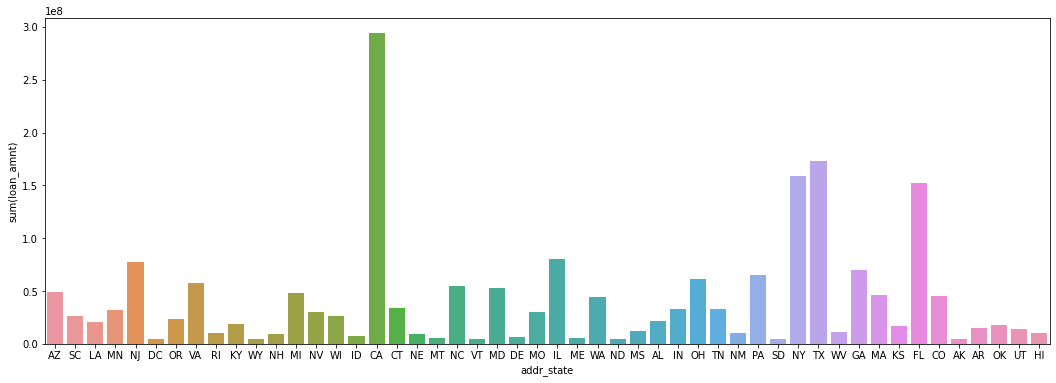

In [14]:
plt.figure(figsize=(18,6))
sb.barplot(pandas_df['addr_state'],pandas_df['sum(loan_amnt)'],data=pandas_df)
plt.show()

In [15]:
### no. of customers from each state

In [16]:
df.groupBy('addr_state').count().show()

+----------+-----+
|addr_state|count|
+----------+-----+
|        AZ| 3149|
|        SC| 1692|
|        LA| 1328|
|        MN| 2078|
|        NJ| 4711|
|        DC|  274|
|        OR| 1562|
|        VA| 3364|
|        RI|  614|
|        KY| 1280|
|        WY|  241|
|        NH|  643|
|        MI| 3249|
|        NV| 2006|
|        WI| 1729|
|        ID|  501|
|        CA|17879|
|        CT| 2038|
|        NE|  642|
|        MT|  343|
+----------+-----+
only showing top 20 rows



In [17]:
pandas_df2 = df.groupBy('addr_state').count().toPandas()

In [18]:
#pandas_df2

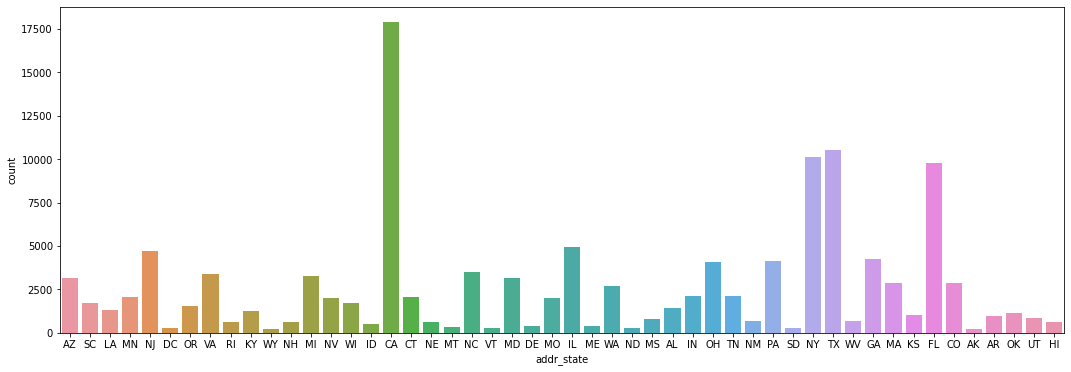

In [19]:
plt.figure(figsize=(18,6))
sb.barplot(pandas_df2['addr_state'],pandas_df2['count'],data=pandas_df2)
plt.show()

In [20]:
#df.where(df.bad_loan=='Yes').groupBy('addr_state').count().show()

In [21]:
### Maximum no of bad loan from each state
pandas_df3 = df.where(df.bad_loan=='Yes').groupBy('addr_state').count().toPandas()

In [22]:
pandas_df3.head()

addr_state  count
0         AZ     49
1         SC     17
2         LA     20
3         MN     26
4         NJ     48

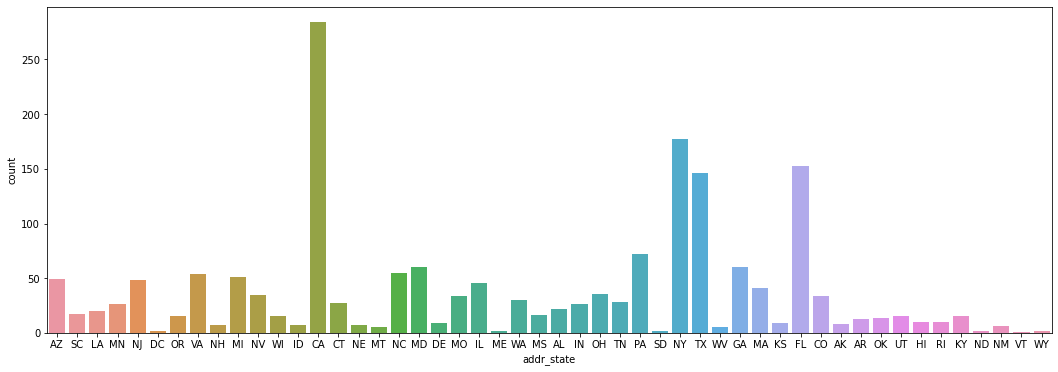

In [23]:
plt.figure(figsize=(18,6))
sb.barplot(pandas_df3['addr_state'],pandas_df3['count'],data=pandas_df3)
plt.show()

In [24]:
spark.sql('select grade , sum(loan_amnt) as total_loan_amnt from cleaned_data group by grade').show()

+-----+---------------+
|grade|total_loan_amnt|
+-----+---------------+
|    F|        6326275|
|    E|       83832000|
|    B|      591596125|
|    D|      267034700|
|    C|      495916925|
|    A|      604816200|
|    G|        1387050|
+-----+---------------+



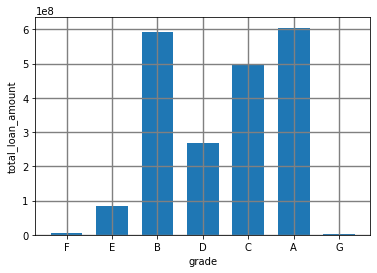

In [25]:
pandas_df4 = spark.sql('select grade , sum(loan_amnt) as total_loan_amnt from cleaned_data group by grade').toPandas()


x = pandas_df4['grade']
y = pandas_df4['total_loan_amnt']
plt.bar(x,y,.7,align='center')
plt.grid(True, color = "grey", linewidth = "1.4", linestyle = "-")
plt.xlabel('grade')
plt.ylabel('total_loan_amount')
plt.show()

In [26]:
spark.sql('select grade , bad_loan,sum(loan_amnt) as total_loan_amnt from cleaned_data group by grade,bad_loan').show()

+-----+--------+---------------+
|grade|bad_loan|total_loan_amnt|
+-----+--------+---------------+
|    G|     Yes|         176475|
|    B|      No|      584562525|
|    F|      No|        5842125|
|    E|     Yes|        3624800|
|    C|     Yes|        8643900|
|    B|     Yes|        7033600|
|    A|     Yes|        3148050|
|    F|     Yes|         484150|
|    C|      No|      487273025|
|    A|      No|      601668150|
|    E|      No|       80207200|
|    D|     Yes|        7226725|
|    G|      No|        1210575|
|    D|      No|      259807975|
+-----+--------+---------------+



In [27]:
pandas_df5 = spark.sql('select grade , bad_loan,sum(loan_amnt) as total_loan_amnt from cleaned_data group by grade,bad_loan').toPandas()

In [28]:
pandas_df5.head()

grade bad_loan  total_loan_amnt
0     G      Yes           176475
1     B       No        584562525
2     F       No          5842125
3     E      Yes          3624800
4     C      Yes          8643900

In [29]:
#y = pandas_df5.total_loan_amnt

x1_yes = pandas_df5[pandas_df5.bad_loan=='Yes']

x2_no = pandas_df5[pandas_df5.bad_loan=='No']

In [30]:
x2_no

grade bad_loan  total_loan_amnt
1      B       No        584562525
2      F       No          5842125
8      C       No        487273025
9      A       No        601668150
10     E       No         80207200
12     G       No          1210575
13     D       No        259807975

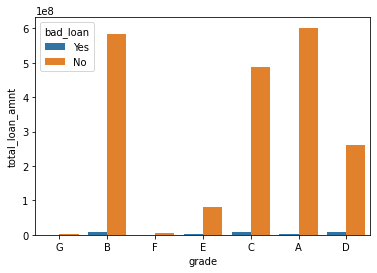

In [31]:
s = sb.barplot(x ="grade", y = 'total_loan_amnt', data = pandas_df5, hue = "bad_loan")
plt.show()

In [32]:
spark.sql('select loan_amnt from cleaned_data').show()

+---------+
|loan_amnt|
+---------+
|    16000|
|    25000|
|    15000|
|    10000|
|    12000|
|     5975|
|    24000|
|    30000|
|    15000|
|    14000|
|    12000|
|     5100|
|    10000|
|    10000|
|    20000|
|    10000|
|     9500|
|    13000|
|    14000|
|    15000|
+---------+
only showing top 20 rows



In [33]:
loan = df.select('loan_amnt').toPandas()

In [34]:
loan.describe()

loan_amnt
count  128412.000000
mean    15971.321021
std     10150.384233
min      1000.000000
25%      8000.000000
50%     14000.000000
75%     21600.000000
max     40000.000000

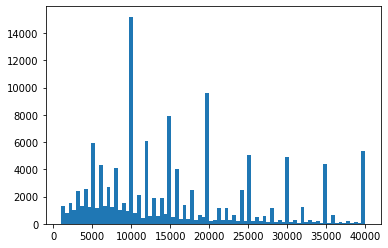

In [35]:
plt.hist(loan,bins=80)
plt.show()

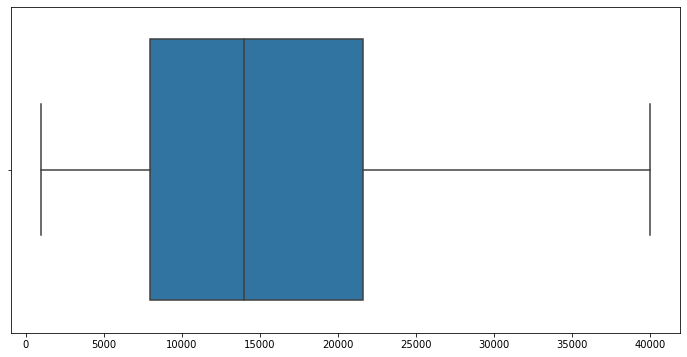

In [36]:
plt.figure(figsize=(12,6))
sb.boxplot(x=loan.to_numpy())
plt.show()

In [37]:
### Distribution is not symmetric

In [38]:
spark.sql('select loan_amnt,bad_loan from cleaned_data').show()

+---------+--------+
|loan_amnt|bad_loan|
+---------+--------+
|    16000|      No|
|    25000|      No|
|    15000|      No|
|    10000|      No|
|    12000|      No|
|     5975|      No|
|    24000|      No|
|    30000|      No|
|    15000|      No|
|    14000|      No|
|    12000|      No|
|     5100|      No|
|    10000|      No|
|    10000|      No|
|    20000|      No|
|    10000|      No|
|     9500|      No|
|    13000|      No|
|    14000|      No|
|    15000|      No|
+---------+--------+
only showing top 20 rows



In [39]:
df2 = df.toPandas()

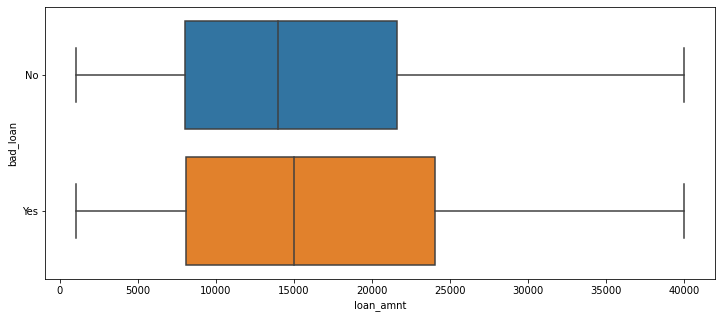

In [40]:
plt.figure(figsize=(12,5))
sb.boxplot(x = 'loan_amnt',y = 'bad_loan',data = df2)
plt.show()

In [41]:
def trim(string):
    return string.strip('%')

spark.udf.register('trimpercent',trim)

<function __main__.trim(string)>

In [42]:
spark.sql('select int_rate,cast(trimpercent(int_rate) as float) as int_rate_float from cleaned_data').show()

+--------+--------------+
|int_rate|int_rate_float|
+--------+--------------+
|  13.56%|         13.56|
|  13.56%|         13.56|
|   6.67%|          6.67|
|  10.08%|         10.08|
|  11.55%|         11.55|
|   8.46%|          8.46|
|  11.55%|         11.55|
|  19.92%|         19.92|
|  13.56%|         13.56|
|   7.84%|          7.84|
|  18.94%|         18.94|
|  12.73%|         12.73|
|  18.94%|         18.94|
|  12.73%|         12.73|
|  11.06%|         11.06|
|   6.11%|          6.11|
|  10.47%|         10.47|
|  11.55%|         11.55|
|  22.35%|         22.35|
|   6.11%|          6.11|
+--------+--------------+
only showing top 20 rows



In [43]:
spark.sql('select bad_loan,cast(trimpercent(int_rate) as float) as int_rate_float from cleaned_data').show()

+--------+--------------+
|bad_loan|int_rate_float|
+--------+--------------+
|      No|         13.56|
|      No|         13.56|
|      No|          6.67|
|      No|         10.08|
|      No|         11.55|
|      No|          8.46|
|      No|         11.55|
|      No|         19.92|
|      No|         13.56|
|      No|          7.84|
|      No|         18.94|
|      No|         12.73|
|      No|         18.94|
|      No|         12.73|
|      No|         11.06|
|      No|          6.11|
|      No|         10.47|
|      No|         11.55|
|      No|         22.35|
|      No|          6.11|
+--------+--------------+
only showing top 20 rows



In [44]:
df4 = spark.sql('select bad_loan,cast(trimpercent(int_rate) as float) as int_rate_float from cleaned_data').toPandas()

In [45]:
df4.groupby('bad_loan').aggregate(['min','max','mean'])

int_rate_float                      
                    min        max       mean
bad_loan                                     
No                 6.00  30.990000  12.878821
Yes                6.11  30.940001  16.506908

In [46]:
spark.sql('select home_ownership,bad_loan,loan_amnt from cleaned_data').show()

+--------------+--------+---------+
|home_ownership|bad_loan|loan_amnt|
+--------------+--------+---------+
|      MORTGAGE|      No|    16000|
|      MORTGAGE|      No|    25000|
|      MORTGAGE|      No|    15000|
|          RENT|      No|    10000|
|      MORTGAGE|      No|    12000|
|          RENT|      No|     5975|
|      MORTGAGE|      No|    24000|
|          RENT|      No|    30000|
|          RENT|      No|    15000|
|          RENT|      No|    14000|
|          RENT|      No|    12000|
|      MORTGAGE|      No|     5100|
|          RENT|      No|    10000|
|      MORTGAGE|      No|    10000|
|      MORTGAGE|      No|    20000|
|           OWN|      No|    10000|
|      MORTGAGE|      No|     9500|
|      MORTGAGE|      No|    13000|
|          RENT|      No|    14000|
|          RENT|      No|    15000|
+--------------+--------+---------+
only showing top 20 rows



In [47]:
df5 = spark.sql('select home_ownership,bad_loan,loan_amnt from cleaned_data').toPandas()

In [48]:
df5.head()

home_ownership bad_loan  loan_amnt
0       MORTGAGE       No      16000
1       MORTGAGE       No      25000
2       MORTGAGE       No      15000
3           RENT       No      10000
4       MORTGAGE       No      12000

In [49]:
df5.groupby(['home_ownership','bad_loan']).loan_amnt.describe()

count          mean           std     min      25%  \
home_ownership bad_loan                                                         
ANY            No          326.0  12382.131902   7988.005006  1000.0   6525.0   
               Yes           7.0  12557.142857  13090.945617  1000.0   4950.0   
MORTGAGE       No        62678.0  17652.562303  10562.935887  1000.0  10000.0   
               Yes         812.0  18164.470443  10773.412764  1000.0  10000.0   
OWN            No        13754.0  14796.815472   9648.556337  1000.0   7500.0   
               Yes         239.0  15177.405858   9862.373428  1000.0   8000.0   
RENT           No        49826.0  14181.196564   9368.788403  1000.0   7000.0   
               Yes         770.0  15419.285714  10192.880420  1000.0   7500.0   

                             50%      75%      max  
home_ownership bad_loan                             
ANY            No        10000.0  16000.0  40000.0  
               Yes       10000.0  13500.0  40000.0  
MORTGAGE       No        15000.0  25000.0  40000.0  
               Yes       16000.0  25000.0  40000.0  
OWN            No        12000.0  20000.0  40000.0  
               Yes       12000.0  20000.0  40000.0  
RENT           No        12000.0  20000.0  40000.0  
               Yes       13000.0  21000.0  40000.0

In [50]:
spark.sql('select purpose,bad_loan,loan_amnt from cleaned_data').show()

+------------------+--------+---------+
|           purpose|bad_loan|loan_amnt|
+------------------+--------+---------+
|       credit_card|      No|    16000|
|debt_consolidation|      No|    25000|
|debt_consolidation|      No|    15000|
|debt_consolidation|      No|    10000|
|       credit_card|      No|    12000|
|debt_consolidation|      No|     5975|
|debt_consolidation|      No|    24000|
|debt_consolidation|      No|    30000|
|debt_consolidation|      No|    15000|
|       credit_card|      No|    14000|
|debt_consolidation|      No|    12000|
|debt_consolidation|      No|     5100|
|       credit_card|      No|    10000|
|  home_improvement|      No|    10000|
|  home_improvement|      No|    20000|
|debt_consolidation|      No|    10000|
|debt_consolidation|      No|     9500|
|       credit_card|      No|    13000|
|debt_consolidation|      No|    14000|
|       credit_card|      No|    15000|
+------------------+--------+---------+
only showing top 20 rows



In [51]:
#df6 = spark.sql('select purpose,bad_loan,loan_amnt from cleaned_data').toPandas()
df6 = spark.sql('select purpose,loan_status,loan_amnt from cleaned_data').toPandas()

In [52]:
#df6.groupby(['purpose','bad_loan']).loan_amnt.describe()
df6.groupby(['purpose','loan_status']).loan_amnt.describe()

count          mean           std      min  \
purpose  loan_status                                                      
car      Charged Off           1.0  20000.000000           NaN  20000.0   
         Current             934.0  10593.495717   8144.208343   1000.0   
         Fully Paid           86.0  10495.930233   8875.306838   1000.0   
         In Grace Period       6.0  12666.666667   4033.195590   5000.0   
         Late (16-30 days)     5.0   8600.000000   6298.809411   2500.0   
...                            ...           ...           ...      ...   
vacation Current             736.0   6353.328804   6038.439153   1000.0   
         Fully Paid           48.0   6045.312500   6596.180101   1000.0   
         In Grace Period       2.0   8100.000000   9758.073580   1200.0   
         Late (16-30 days)     2.0  11500.000000  12020.815280   3000.0   
         Late (31-120 days)   13.0   9550.000000   9890.525770   1500.0   

                                  25%      50%       75%      max  
purpose  loan_status                                               
car      Charged Off         20000.00  20000.0  20000.00  20000.0  
         Current              5000.00   8000.0  14400.00  40000.0  
         Fully Paid           4850.00   8075.0  12575.00  40000.0  
         In Grace Period     12250.00  14000.0  15000.00  16000.0  
         Late (16-30 days)    2500.00   8000.0  14000.00  16000.0  
...                               ...      ...       ...      ...  
vacation Current              2500.00   5000.0   8000.00  40000.0  
         Fully Paid           2968.75   4400.0   6006.25  33000.0  
         In Grace Period      4650.00   8100.0  11550.00  15000.0  
         Late (16-30 days)    7250.00  11500.0  15750.00  20000.0  
         Late (31-120 days)   2500.00   3200.0  20000.00  25000.0  

[67 rows x 8 columns]